# Analyze and visulization of Istanbul Airbnb Data

In [ ]:
import numpy as np
import geopandas as gpd
import pandas as pd
import shapely.geometry as shp
import matplotlib.pyplot as plt

In [2]:
house = pd.read_csv('./data/listings.csv')

In [3]:
type (house)

pandas.core.frame.DataFrame

In [4]:
house.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [5]:
house['geometry'] = house [['longitude', 'latitude']].apply(shp.Point, axis=1) 

C:\Users\Ahmet Ay\anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [6]:
house

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry
0,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.069760,29.043790,Entire home/apt,1235,365,41,2018-11-07,0.29,2,363,0,NaN,POINT (29.04379 41.06976)
1,27271,Lovely apartment in perfect location,117026,Mutlu,NaN,Beyoglu,41.032540,28.981530,Entire home/apt,408,30,2,2018-05-04,0.02,1,333,0,NaN,POINT (28.98153 41.03254)
2,28277,Duplex Apartment 11 with Terrace,121607,Alen,NaN,Sisli,41.046720,28.984020,Entire home/apt,688,14,1,2021-05-15,0.13,16,357,1,NaN,POINT (28.98402 41.04672)
3,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.091040,29.055800,Entire home/apt,1412,3,0,NaN,NaN,1,88,0,NaN,POINT (29.0558 41.09104)
4,29241,"↪ Istanbul, Your second house",125742,Şevki,NaN,Beyoglu,41.048030,28.952270,Private room,515,3,0,NaN,NaN,1,365,0,NaN,POINT (28.95227 41.04803)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22690,54033573,Atasehir Andromeda Residance,37430492,Furkan,NaN,Atasehir,40.990900,29.106680,Entire home/apt,355,1,0,NaN,NaN,2,362,0,NaN,POINT (29.10668 40.9909)
22691,54033882,Residence apartment,192112660,Ali,NaN,Kadikoy,40.994623,29.057332,Entire home/apt,412,21,0,NaN,NaN,2,365,0,NaN,POINT (29.05733199445228 40.99462273301579)
22692,54034438,Lovely 1 bedroom unit in 4.Levent,101818736,Moussaab,NaN,Kagithane,41.086150,28.999100,Entire home/apt,800,1,0,NaN,NaN,1,365,0,NaN,POINT (28.9991 41.08615)
22693,54034481,Galata Kulesi Manzara,208184830,Senem,NaN,Beyoglu,41.027259,28.976529,Entire home/apt,4000,1,1,2021-12-29,1.00,9,357,1,NaN,POINT (28.97652857114285 41.027258679714855)


In [7]:
house = gpd.GeoDataFrame(house)

In [8]:
type (house)

geopandas.geodataframe.GeoDataFrame

In [9]:
house.crs= {'init':'epsg:4329'}

C:\Users\Ahmet Ay\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [10]:
house.crs

<Geographic 2D CRS: +init=epsg:4329 +type=crs>
Name: WGS 84 (3D)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World: Afghanistan, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antarctica, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belgium, Belgium, Belize, Benin, Bermuda, Bhutan, Bolivia, Bonaire, Saint Eustasius and Saba, Bosnia and Herzegovina, Botswana, Bouvet Island, Brazil, British Indian Ocean Territory, British Virgin Islands, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Cape Verde, Cayman Islands, Central African Republic, Chad, Chile, China, Christmas Island, Cocos (Keeling) Islands, Comoros, Congo, Cook Islands, Costa Rica, Côte d'Ivoire (Ivory Coast), Croatia, Cuba, Curacao, Cyprus, Czechia, Denmark, Djibouti, Dominica, Dominican Republic, East Timor, Ecuador, Egypt, El Salvador, Equato

In [11]:
house.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry
0,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06976,29.04379,Entire home/apt,1235,365,41,2018-11-07,0.29,2,363,0,NaN,POINT (29.04379 41.06976)
1,27271,Lovely apartment in perfect location,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,408,30,2,2018-05-04,0.02,1,333,0,NaN,POINT (28.98153 41.03254)
2,28277,Duplex Apartment 11 with Terrace,121607,Alen,NaN,Sisli,41.04672,28.98402,Entire home/apt,688,14,1,2021-05-15,0.13,16,357,1,NaN,POINT (28.98402 41.04672)
3,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09104,29.05580,Entire home/apt,1412,3,0,NaN,NaN,1,88,0,NaN,POINT (29.05580 41.09104)
4,29241,"↪ Istanbul, Your second house",125742,Şevki,NaN,Beyoglu,41.04803,28.95227,Private room,515,3,0,NaN,NaN,1,365,0,NaN,POINT (28.95227 41.04803)


In [13]:
ist = gpd.read_file('./data/neighbourhoods.geojson')

In [14]:
ist

,neighbourhood,neighbourhood_group,geometry
0,Sile,None,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41..."
1,Catalca,None,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41..."
2,Eyup,None,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41..."
3,Sariyer,None,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41..."
4,Arnavutkoy,None,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41..."
5,Silivri,None,"MULTIPOLYGON (((28.38724 41.04804, 28.38520 41..."
6,Kagithane,None,"MULTIPOLYGON (((29.00345 41.09491, 29.00361 41..."
7,Buyukcekmece,None,"MULTIPOLYGON (((28.55267 41.10449, 28.55318 41..."
8,Esenyurt,None,"MULTIPOLYGON (((28.63047 41.01797, 28.62855 41..."
9,Beylikduzu,None,"MULTIPOLYGON (((28.68545 41.00178, 28.68214 41..."


In [15]:
house_isim = house.dropna(subset=['name'])

In [16]:
house_isim.loc[house_isim['name'].str.contains('merkez')]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry
400,1120982,"Temiz,Ucuz ve merkezi bölgede oda",6143828,Meral,NaN,Bahcelievler,40.999500,28.835620,Private room,466,1,6,2015-04-22,0.06,1,365,0,NaN,POINT (28.83562 40.99950)
505,1605564,istanbulun merkezi olan beyoğlu,8471053,Halef,NaN,Beyoglu,41.039720,28.981600,Private room,221,1,0,NaN,NaN,1,365,0,NaN,POINT (28.98160 41.03972)
1006,3975639,Beşiktaş merkezde stüdyo daire,20604044,Ali,NaN,Sisli,41.050520,28.999120,Entire home/apt,773,1,0,NaN,NaN,1,365,0,NaN,POINT (28.99912 41.05052)
1589,6463166,Sehrin tam merkezinde 1+1 daire,33752703,Cihan,NaN,Fatih,41.014910,28.942610,Entire home/apt,927,1,0,NaN,NaN,1,365,0,NaN,POINT (28.94261 41.01491)
1909,8416143,"Cihangir'de sessiz, keyifli, merkezi daire",18435741,Bahan,NaN,Beyoglu,41.030830,28.983430,Entire home/apt,263,2,1,2021-11-21,0.75,1,35,1,NaN,POINT (28.98343 41.03083)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22601,53996583,Kadıköy merkezi konumda teraslı daire,437470930,Çağla,NaN,Kadikoy,40.993527,29.037154,Entire home/apt,589,2,0,NaN,NaN,1,8,0,NaN,POINT (29.03715 40.99353)
22629,54009586,Kadıköy'de merkezî lokasyonda özel oda,249014922,Ismail Ege,NaN,Kadikoy,40.996864,29.041584,Private room,286,1,0,NaN,NaN,2,361,0,NaN,POINT (29.04158 40.99686)
22641,54012564,Ücretsiz otopark ve şehir merkezi lüks villa,397262629,Gül,NaN,Beykoz,41.075458,29.073866,Private room,400,1,0,NaN,NaN,1,365,0,NaN,POINT (29.07387 41.07546)
22661,54020128,Eminönü merkezinde Teras deniz Manzaralı Hotel,437730814,MUHAMMET Arif,NaN,Fatih,41.019294,28.965103,Private room,347,1,0,NaN,NaN,1,362,0,NaN,POINT (28.96510 41.01929)


<AxesSubplot:>

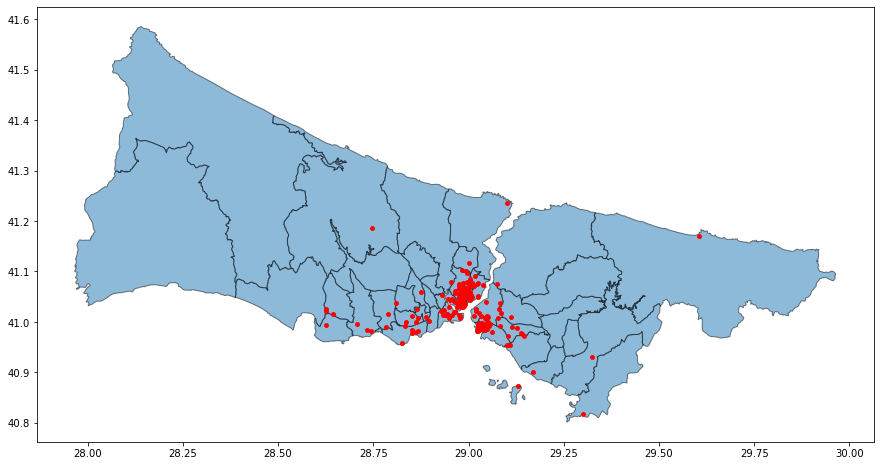

In [141]:
ax = ist.plot(figsize=(15,15), alpha = 0.5, edgecolor ='black')
house_isim.loc[house_isim['name'].str.contains('merkezi')].plot(ax=ax, color='red', marker='o', markersize=15)


In [102]:
house_joined = gpd.sjoin(house_isim, ist, op='within', how='left')

C:\Users\Ahmet Ay\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Ahmet Ay\AppData\Local\Temp\ipykernel_5540\2574498077.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4329 +type=crs
Right CRS: EPSG:4326

  house_joined = gpd.sjoin(house_isim, ist, op='within', how='left')


In [103]:
house_avg = house_joined.groupby(['neighbourhood_right']).mean()

In [104]:
house_avg_joined = house_joined.groupby(['neighbourhood_right']).mean().sort_values('price', ascending=False)

In [105]:
house_avg_joined

,id,host_id,neighbourhood_group_left,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,index_right
neighbourhood_right,,,,,,,,,,,,,,
Silivri,3.825111e+07,2.062971e+08,NaN,41.099089,28.227659,2686.000000,3.222222,2.694444,0.537500,1.583333,258.222222,1.333333,NaN,5.0
Sariyer,3.781628e+07,1.848027e+08,NaN,41.145406,29.041561,2588.204620,7.594059,3.759076,0.611280,6.511551,277.478548,1.689769,NaN,3.0
Beykoz,4.118240e+07,2.033529e+08,NaN,41.114209,29.145197,2368.456693,4.370079,4.543307,0.976400,3.874016,269.401575,2.685039,NaN,27.0
Buyukcekmece,4.083186e+07,2.486725e+08,NaN,41.025259,28.545791,1450.166667,7.033333,1.108333,0.413421,5.641667,309.566667,0.566667,NaN,7.0
Kucukcekmece,4.269233e+07,2.412541e+08,NaN,41.020414,28.782258,1435.081081,5.697297,2.308108,0.777377,2.864865,265.551351,0.962162,NaN,13.0
Basaksehir,4.211942e+07,2.387337e+08,NaN,41.093422,28.765787,1424.625000,8.100000,1.600000,0.485000,7.487500,251.850000,0.733333,NaN,14.0
Zeytinburnu,4.033443e+07,2.300627e+08,NaN,41.002799,28.903441,1253.250000,3.065217,4.663043,1.028750,2.391304,270.782609,2.989130,NaN,20.0
Catalca,3.618115e+07,2.014153e+08,NaN,41.311640,28.399902,1226.916667,2.875000,3.250000,0.745455,1.541667,257.750000,2.500000,NaN,1.0
Beylikduzu,4.391537e+07,2.593687e+08,NaN,40.993158,28.638731,1134.103175,9.285714,1.738095,0.525652,1.960317,259.023810,1.023810,NaN,9.0


In [107]:
house_avg_joined

,id,host_id,neighbourhood_group_left,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,index_right
neighbourhood_right,,,,,,,,,,,,,,
Silivri,3.825111e+07,2.062971e+08,NaN,41.099089,28.227659,2686.000000,3.222222,2.694444,0.537500,1.583333,258.222222,1.333333,NaN,5.0
Sariyer,3.781628e+07,1.848027e+08,NaN,41.145406,29.041561,2588.204620,7.594059,3.759076,0.611280,6.511551,277.478548,1.689769,NaN,3.0
Beykoz,4.118240e+07,2.033529e+08,NaN,41.114209,29.145197,2368.456693,4.370079,4.543307,0.976400,3.874016,269.401575,2.685039,NaN,27.0
Buyukcekmece,4.083186e+07,2.486725e+08,NaN,41.025259,28.545791,1450.166667,7.033333,1.108333,0.413421,5.641667,309.566667,0.566667,NaN,7.0
Kucukcekmece,4.269233e+07,2.412541e+08,NaN,41.020414,28.782258,1435.081081,5.697297,2.308108,0.777377,2.864865,265.551351,0.962162,NaN,13.0
Basaksehir,4.211942e+07,2.387337e+08,NaN,41.093422,28.765787,1424.625000,8.100000,1.600000,0.485000,7.487500,251.850000,0.733333,NaN,14.0
Zeytinburnu,4.033443e+07,2.300627e+08,NaN,41.002799,28.903441,1253.250000,3.065217,4.663043,1.028750,2.391304,270.782609,2.989130,NaN,20.0
Catalca,3.618115e+07,2.014153e+08,NaN,41.311640,28.399902,1226.916667,2.875000,3.250000,0.745455,1.541667,257.750000,2.500000,NaN,1.0
Beylikduzu,4.391537e+07,2.593687e+08,NaN,40.993158,28.638731,1134.103175,9.285714,1.738095,0.525652,1.960317,259.023810,1.023810,NaN,9.0


In [108]:
ist

,neighbourhood,neighbourhood_group,geometry
0,Sile,None,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41..."
1,Catalca,None,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41..."
2,Eyup,None,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41..."
3,Sariyer,None,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41..."
4,Arnavutkoy,None,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41..."
5,Silivri,None,"MULTIPOLYGON (((28.38724 41.04804, 28.38520 41..."
6,Kagithane,None,"MULTIPOLYGON (((29.00345 41.09491, 29.00361 41..."
7,Buyukcekmece,None,"MULTIPOLYGON (((28.55267 41.10449, 28.55318 41..."
8,Esenyurt,None,"MULTIPOLYGON (((28.63047 41.01797, 28.62855 41..."
9,Beylikduzu,None,"MULTIPOLYGON (((28.68545 41.00178, 28.68214 41..."


In [109]:
ist_joined = ist.merge(house_avg_joined, left_on='neighbourhood', right_on='neighbourhood_right')

In [110]:
ist_joined.head(10)

,neighbourhood,neighbourhood_group,geometry,id,host_id,neighbourhood_group_left,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,index_right
0,Sile,None,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41...",4.346080e+07,2.522866e+08,NaN,41.146304,29.730539,1024.803571,6.750000,5.008929,0.734404,6.924107,268.281250,2.437500,NaN,0.0
1,Catalca,None,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41...",3.618115e+07,2.014153e+08,NaN,41.311640,28.399902,1226.916667,2.875000,3.250000,0.745455,1.541667,257.750000,2.500000,NaN,1.0
2,Eyup,None,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41...",4.009169e+07,2.173026e+08,NaN,41.107069,28.923083,764.623762,13.237624,3.678218,0.574756,2.742574,265.846535,1.049505,NaN,2.0
3,Sariyer,None,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41...",3.781628e+07,1.848027e+08,NaN,41.145406,29.041561,2588.204620,7.594059,3.759076,0.611280,6.511551,277.478548,1.689769,NaN,3.0
4,Arnavutkoy,None,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41...",4.466573e+07,2.879053e+08,NaN,41.225056,28.701966,976.934783,10.380435,6.108696,0.935370,3.239130,271.934783,3.239130,NaN,4.0
5,Silivri,None,"MULTIPOLYGON (((28.38724 41.04804, 28.38520 41...",3.825111e+07,2.062971e+08,NaN,41.099089,28.227659,2686.000000,3.222222,2.694444,0.537500,1.583333,258.222222,1.333333,NaN,5.0
6,Kagithane,None,"MULTIPOLYGON (((29.00345 41.09491, 29.00361 41...",4.242325e+07,2.404394e+08,NaN,41.082104,28.987322,556.908903,13.902692,1.360248,0.535325,12.300207,253.919255,0.710145,NaN,6.0
7,Buyukcekmece,None,"MULTIPOLYGON (((28.55267 41.10449, 28.55318 41...",4.083186e+07,2.486725e+08,NaN,41.025259,28.545791,1450.166667,7.033333,1.108333,0.413421,5.641667,309.566667,0.566667,NaN,7.0
8,Esenyurt,None,"MULTIPOLYGON (((28.63047 41.01797, 28.62855 41...",4.283379e+07,2.621521e+08,NaN,41.027902,28.663553,688.694888,26.023962,1.924920,0.490431,5.035144,283.126198,0.944089,NaN,8.0
9,Beylikduzu,None,"MULTIPOLYGON (((28.68545 41.00178, 28.68214 41...",4.391537e+07,2.593687e+08,NaN,40.993158,28.638731,1134.103175,9.285714,1.738095,0.525652,1.960317,259.023810,1.023810,NaN,9.0


Text(0.5, 1.0, 'İlçelere Göre Hesaplanmış Ortalama Airbnb Günlük Kiralama Ücretleri - (TL)')

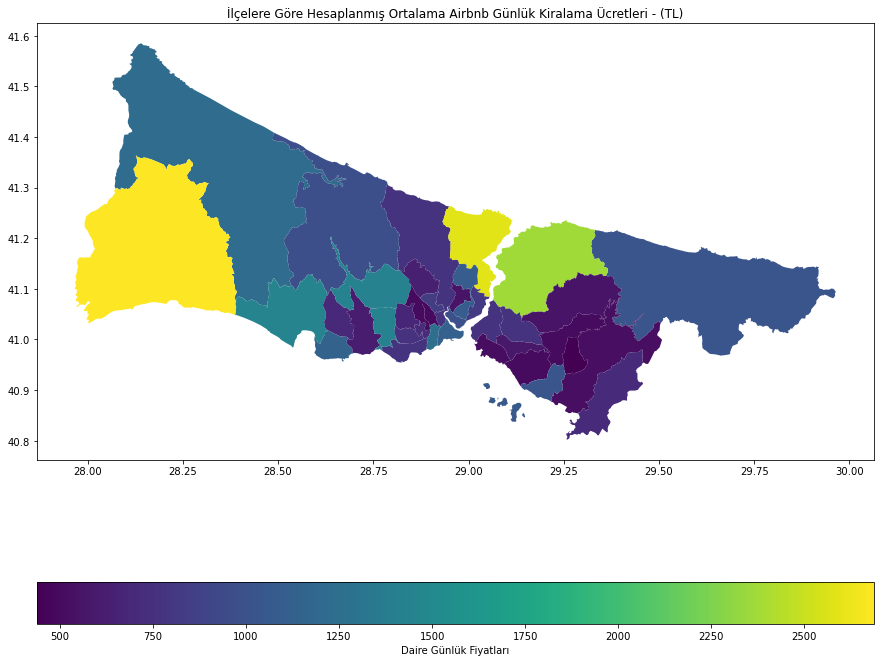

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ist_joined.plot(column='price', ax=ax, legend=True, legend_kwds={'label': "Daire Günlük Fiyatları",'orientation': "horizontal"})
ax.set_title("İlçelere Göre Hesaplanmış Ortalama Airbnb Günlük Kiralama Ücretleri - (TL)")

In [122]:
house_joined['sum']  =1

In [123]:
house_sum = house_joined.groupby(['neighbourhood_right']).count()['sum']

In [124]:
house_sum2 = house_sum.to_frame()

In [125]:
house_sum2

,sum
neighbourhood_right,
Adalar,236
Arnavutkoy,92
Atasehir,353
Avcilar,215
Bagcilar,305
Bahcelievler,270
Bakirkoy,287
Basaksehir,240
Bayrampasa,29


In [126]:
ist_sum_joined = ist.merge(house_sum2, left_on='neighbourhood', right_on='neighbourhood_right')

In [127]:
ist_sum_joined

,neighbourhood,neighbourhood_group,geometry,sum
0,Sile,None,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41...",224
1,Catalca,None,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41...",24
2,Eyup,None,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41...",202
3,Sariyer,None,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41...",303
4,Arnavutkoy,None,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41...",92
5,Silivri,None,"MULTIPOLYGON (((28.38724 41.04804, 28.38520 41...",36
6,Kagithane,None,"MULTIPOLYGON (((29.00345 41.09491, 29.00361 41...",483
7,Buyukcekmece,None,"MULTIPOLYGON (((28.55267 41.10449, 28.55318 41...",120
8,Esenyurt,None,"MULTIPOLYGON (((28.63047 41.01797, 28.62855 41...",626
9,Beylikduzu,None,"MULTIPOLYGON (((28.68545 41.00178, 28.68214 41...",126


Text(0.5, 1.0, 'İlçelere Göre Hesaplanmış Airbnb Ev Sayısı')

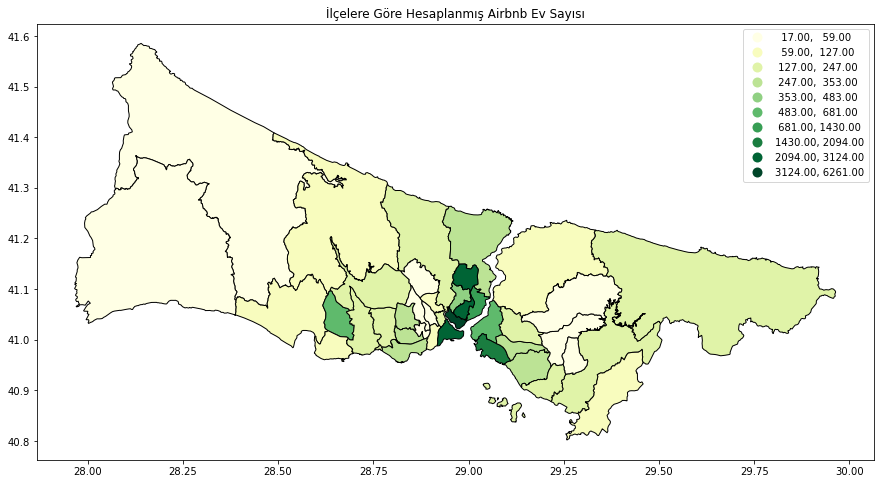

In [130]:
ax = ist_sum_joined.plot(figsize=(15,15), column='sum', scheme='fisher_jenks', k=10, legend=True, cmap='YlGn', edgecolor='black')
ax.set_title("İlçelere Göre Hesaplanmış Airbnb Ev Sayısı")

